




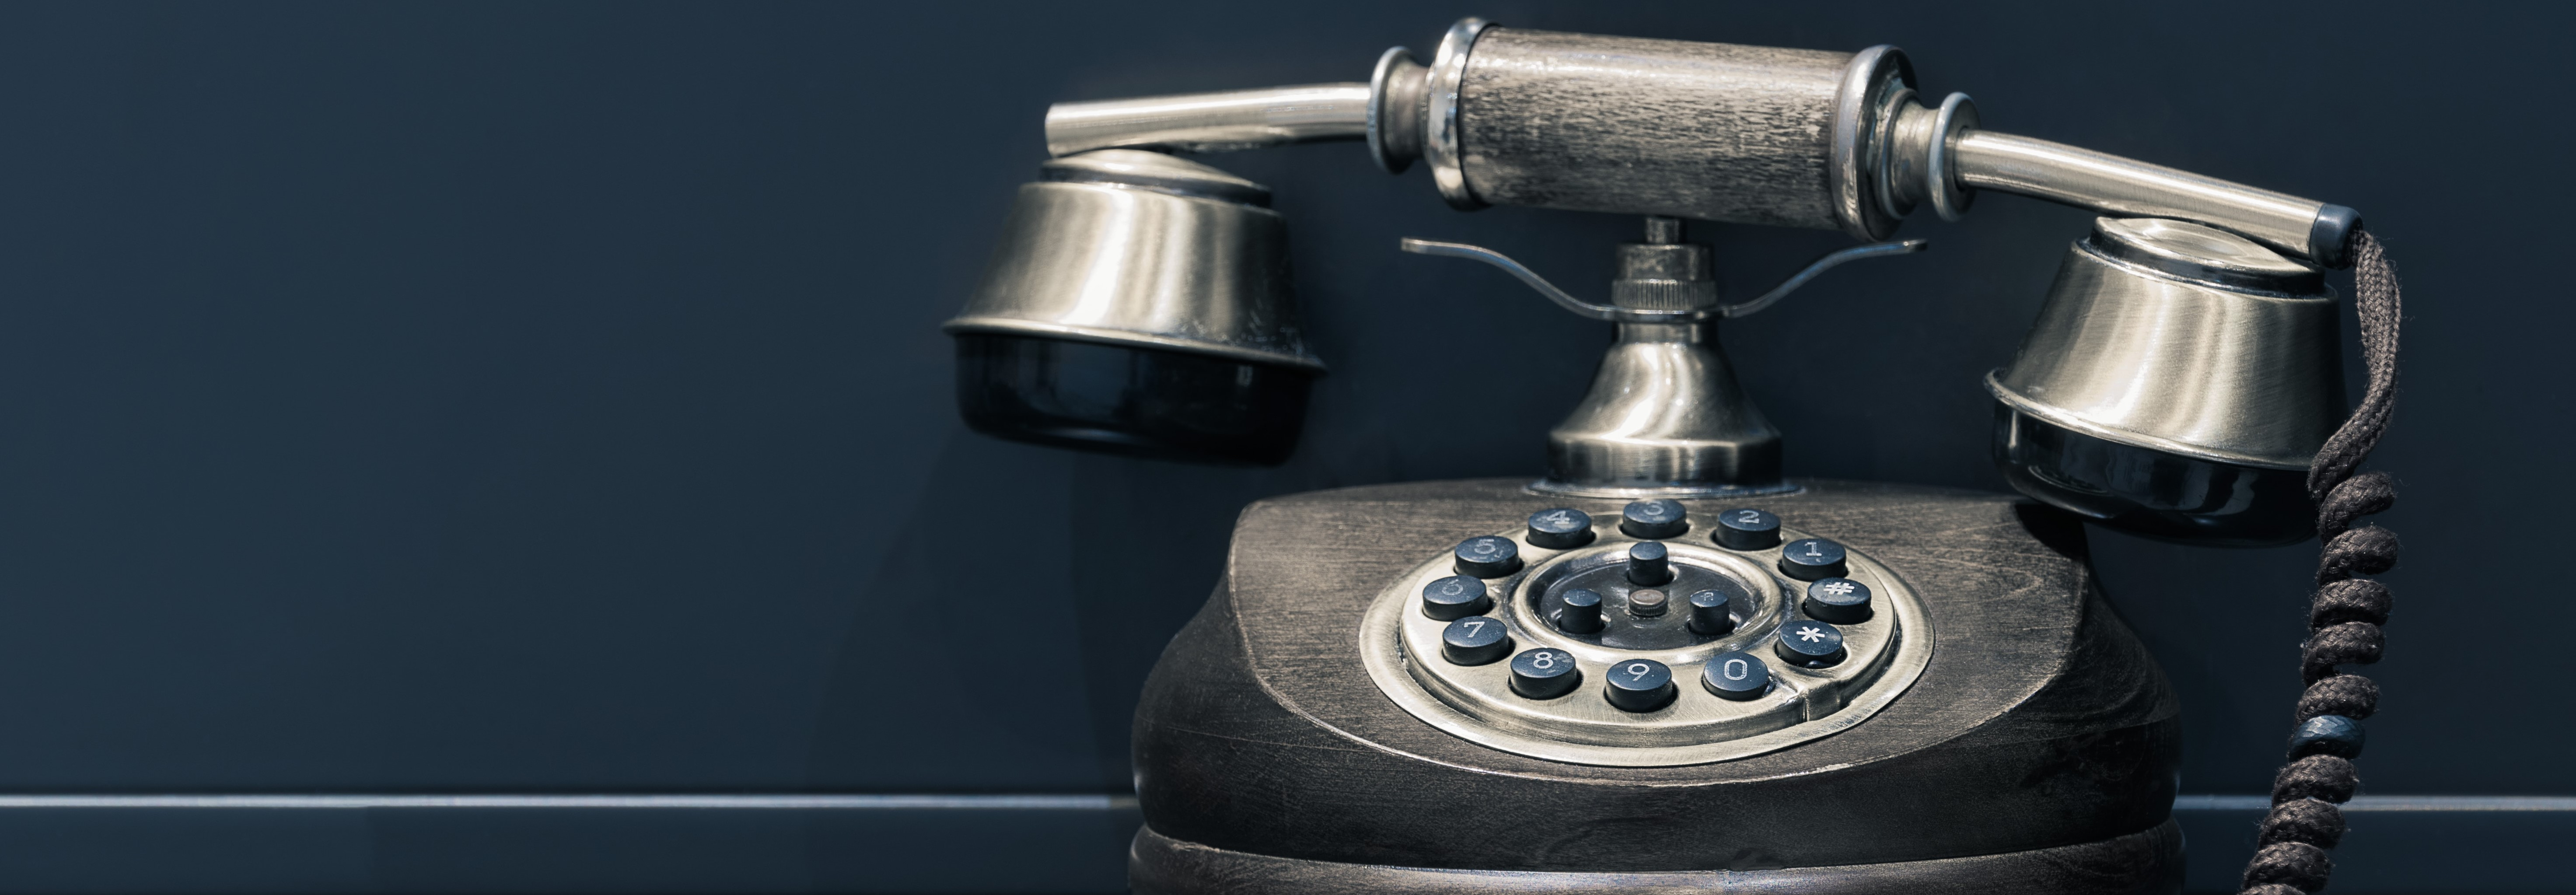

# Overview

This project analyses different aspects about a customer's account at a fictional telecommunications company, SyriaTel. These aspects include how long a customer has had an account, how long they spend on call and how much they are charged for the call. The goal is to help SyriaTel predict whether or not they will lose a customer. I have used the following algortihms to build the models: Logistic Regression, KNearest Neighbors, Decision Tree and Random Forest. The best performing model is the Random Forest,which has been recommended for use by SyriaTel. 

# Business Problem

SyriaTel is a ficitonal telecommunications company which is trying to predict whether or not a customer will stop doing business with them. Being able to predict this will help them retain more customers, reduce the cost of acquiring new customers and maintain their compettitive edge by maintaining a considerable portion of the market share. 

#  Data Understanding and Exploration



The dataset is public and obtained from CrowdAnalytix as part of a prediction competition. It contains information about a customer's usage patterns, including how long they have had an account, the time they spend making calls and they amount they are charged for their calls. 


In [66]:
# Import standard packages
# Data manipulation
import pandas as pd
import numpy as np

# Modelling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score, \
classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("Data/telecoms_info.csv")

In [4]:
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [5]:
df.shape

(3333, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There aren't any missing values in the dataset. 

In [7]:
# Checking for nan values
df.isnull().values.any()

False

In [8]:
# checking for uniqueness
df["number vmail messages"].value_counts().head(5)

0     2411
31      60
29      53
28      51
33      46
Name: number vmail messages, dtype: int64

In [9]:
# checking for uniqueness
len(df["phone number"].unique())

3333

In [10]:
# checking for uniqueness
len(df["state"].unique())

51

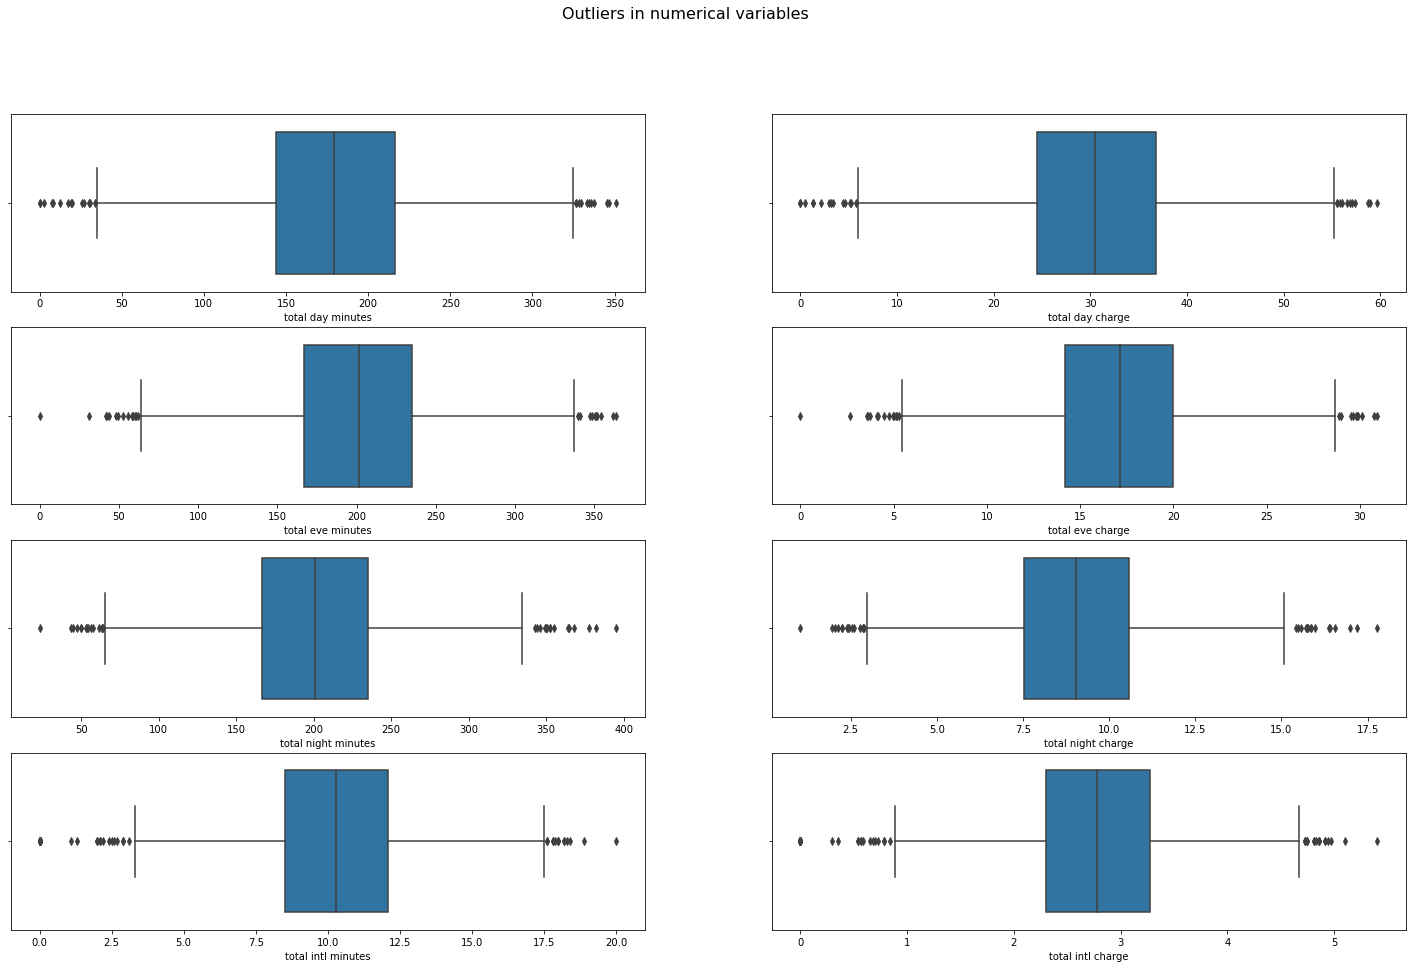

In [11]:
# checking for outliers in the total day, eve, night minutes and day, eve, night charges
fig, axs = plt.subplots(4,2, figsize = (25,15))
plt1 = sns.boxplot(data = df, x = "total day minutes", ax = axs[0,0])
plt2 = sns.boxplot(data = df, x = "total eve minutes", ax = axs[1,0])
plt3 = sns.boxplot(data = df, x = "total night minutes", ax = axs[2,0])
plt4 = sns.boxplot(data = df, x = "total day charge", ax = axs[0,1])
plt5 = sns.boxplot(data = df, x = "total eve charge", ax = axs[1,1])
plt6 = sns.boxplot(data = df, x = "total night charge", ax = axs[2,1])
plt7 = sns.boxplot(data = df, x = "total intl minutes", ax = axs[3,0])
plt8 = sns.boxplot(data = df, x = "total intl charge", ax = axs[3,1])

fig.suptitle("Outliers in numerical variables", fontsize=16)

plt.show()

All the numerical columns have significant amount of outliers. 

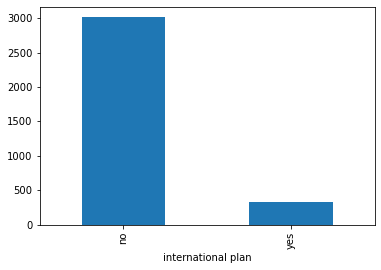

In [12]:
# checking distribution in the interntional plan column
int_plan_group = df.groupby(by="international plan").size()
int_plan_group.plot.bar();

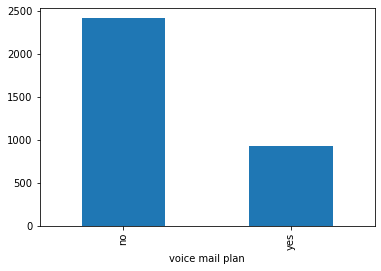

In [13]:
# checking distribution in voice mail plan column
voice_mail_group = df.groupby(by="voice mail plan").size()
voice_mail_group.plot.bar();

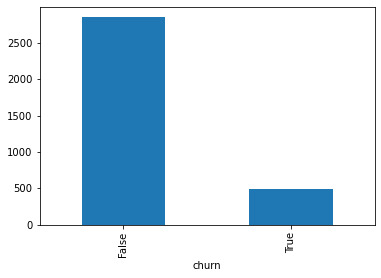

In [14]:
# checking distribution in churn column
churn_group = df.groupby(by="churn").size()
churn_group.plot.bar();

In the target column and the categorical columns, there is a data imbalance. 

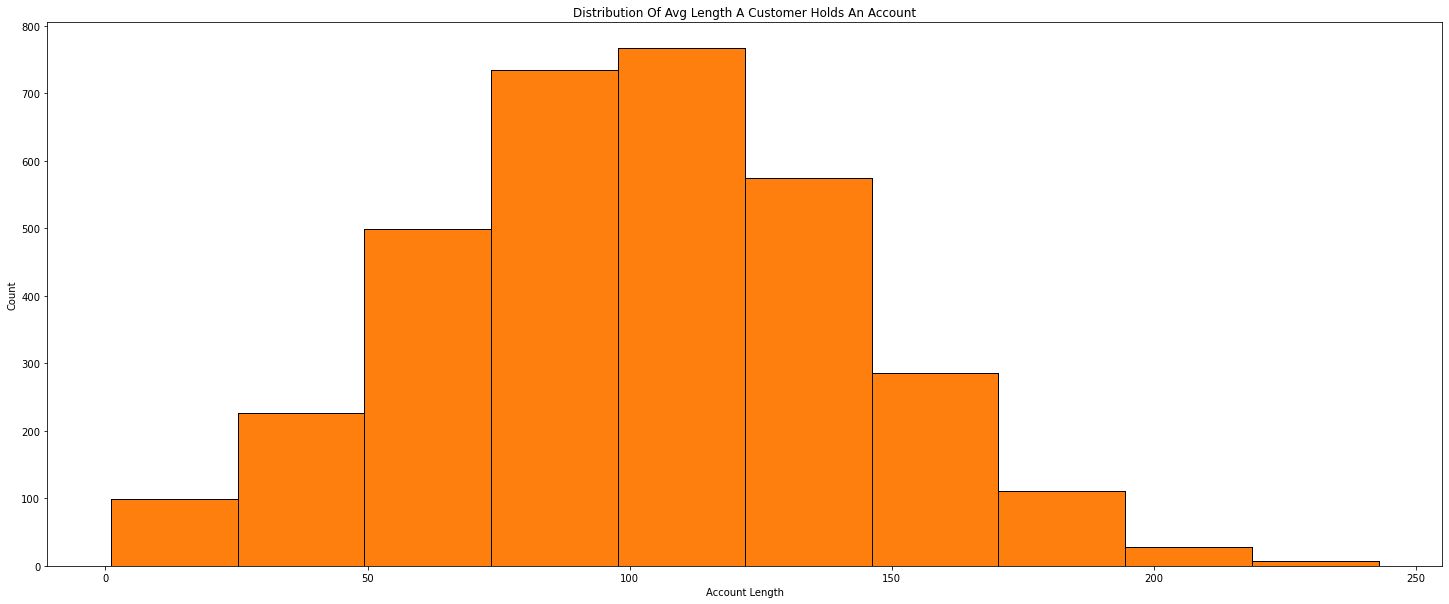

In [15]:
# checking distribution

fig, ax = plt.subplots(figsize = (25,10))
plt.hist(df["account length"], bins = 10, edgecolor="black") 
plt.hist(df["account length"], bins = 10, edgecolor="black")
plt.xlabel("Account Length")
plt.ylabel("Count")
plt.title("Distribution Of Avg Length A Customer Holds An Account");

The period in which customers hold accounts follows a normal distribution. This shows that the data follows a real world scenario, where you can expect most things to follow a normal distribution. 

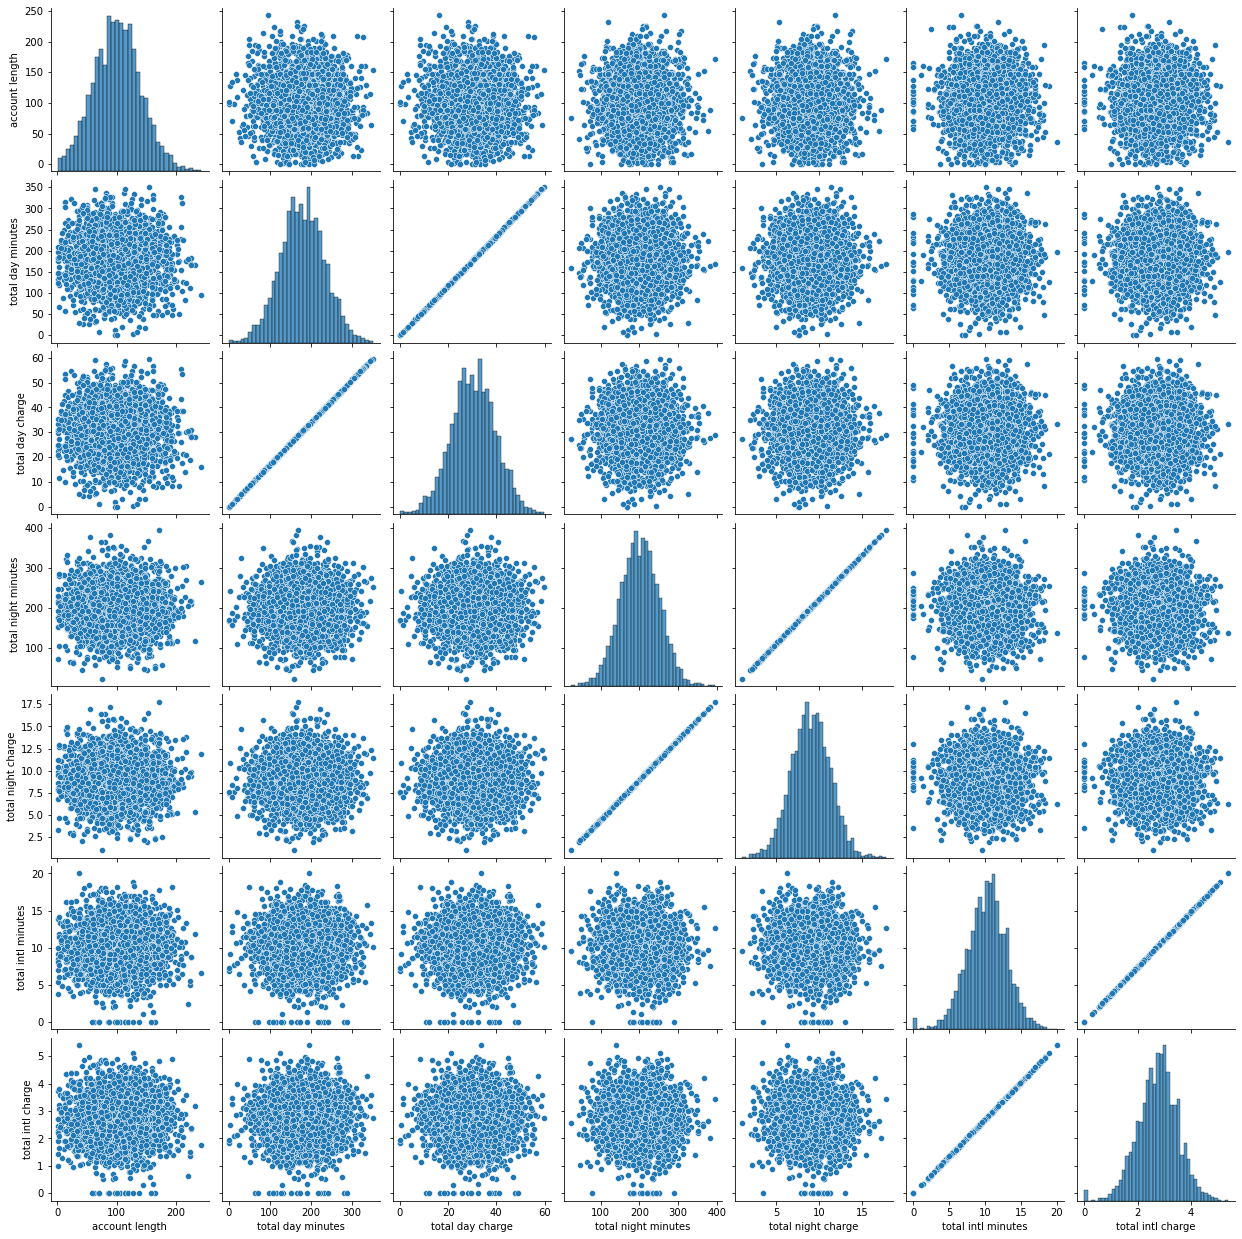

In [16]:
# plot a pairplot to show relationship between our numerical columns
cols_of_interest = ["account length","total day minutes","total day charge", \
                    "total night minutes","total night charge","total intl minutes", \
                   "total intl charge"]
z = df.copy().reindex(columns=cols_of_interest)
sns.pairplot(z);

From the pairplot, most of the numerical columns do not have a linear relationship. The columns that have perfect collinearity are the ones relating to the length of a call and how much the customer is charged. It follows expectations that the length and charge to a call would increase in the same ratio. 

## Data Preparation

I have removed outliers in the numerical columns because outliers will affect the accuracy of the models.

In [17]:
# create a function that removes outliers using z score method
def remove_outliers_zscore(df, columns, threshold=3):

    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers = z_scores > threshold
        df = df[~outliers]

    return df

In [18]:
# Define columns to check for outliers
columns_with_outliers = ["total day minutes","total day charge","total eve minutes",
                         "total eve charge","total night minutes","total night charge",
                         "total intl minutes","total intl charge"]

# Remove outliers from the DataFrame
data = remove_outliers_zscore(df, columns_with_outliers)
data.shape

(3268, 21)

We have dropped 68 rows, which represents less than 5% of the number of rows in our dataset

## Feature Engineering

I have combined "total day minutes", "total eve minutes" and "total night minutes" into a column named "Overall Minutes".
I have also combined "total day charge", "total eve charge", and "total night charge" into a column named "Overall Charge". This is so as to lower dimensionality of my predictor variables and hence reduce overfitting.

In [19]:
data["overall local minutes"] = data["total day minutes"] + data["total eve minutes"] + \
data["total night minutes"]
data["overall local charge"] = data["total day charge"] + data["total eve charge"] + \
data["total night charge"]

## Feature Selection

I have dropped the columns I already combined in feature engineering.Number Vmail messages was dropped because a more than half of the entries were 0s. Phone number and State were dropped because of the lack of uniqueness in the entries.  

In [20]:
# drop unwanted columns 
data = data.drop(["state", "area code","phone number","number vmail messages","total day calls", \
                "total night calls", "total day minutes","total eve minutes","total night minutes", \
                 "total day charge","total eve charge","total night charge"], axis = 1)

## Splitting Data

In [21]:
# separate predictor variables into categorical and numerical
categorical_features = ["international plan","voice mail plan"]
numerical_features = ["account length","overall local minutes","overall local charge", \
                      "total intl minutes","total intl charge","customer service calls"]

# One hot encode categorical variables
ohe = OneHotEncoder(sparse_output = False)

# Create a df with only columns to be ohe
data_without_ohe = data[categorical_features].copy()
feature_array = ohe.fit_transform(data_without_ohe)
data_ohe = pd.DataFrame(feature_array, columns = ["intl plan no","intl plan yes","voice mail plan no", \
                                                  "voice mail plan yes"])
# manually drop first column because of unique values error when dropping with ohe
data_ohe = data_ohe.drop("intl plan no", axis=1)

# split
X = pd.concat([data[numerical_features].reset_index(drop=True),data_ohe.reset_index(drop=True)],axis=1)
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Preprocessing

In [22]:
# standardize data
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_train.columns) 

# apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

## Model 1 - Baseline

I will use Logistic Regression for the first model because it is straightforward and easy to understand. Logistic regression is also computationally efficient and less prone to overfitting.

              precision    recall  f1-score   support

       False       0.96      0.77      0.85       696
        True       0.38      0.80      0.51       121

    accuracy                           0.77       817
   macro avg       0.67      0.79      0.68       817
weighted avg       0.87      0.77      0.80       817

Precision is: 0.375968992248062
Recall is: 0.8016528925619835
accuracy: 0.773561811505508
F1 score is: 0.5118733509234829


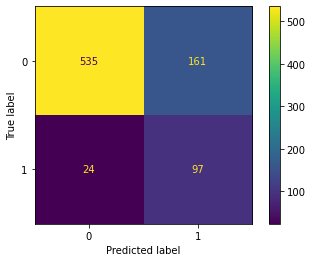

In [107]:
# Instantiate model
logreg = LogisticRegression(random_state = 42,max_iter=1000)
# fit model
logreg.fit(X_train_res, y_train_res)

# make predictions
y_pred = logreg.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))
# visualize performance
logreg_cfm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cfm)
disp.plot();


The baseline model is able to predict whether or not a customer will churn with an accuracy of 77%. The F1 score is 51%. This is a low score. It means the model did not perform well. 

## Model II - KNN

K Nearest Neighbors is an algorithm that identifies a label/value by using the nearest points around it(its neighbors). I have chose KNN because of the size of my dataset; it works well with data that is not too large. KNN also tends to make more accurate predicitons than most classification algorithms

              precision    recall  f1-score   support

       False       0.96      0.85      0.90       696
        True       0.48      0.79      0.60       121

    accuracy                           0.84       817
   macro avg       0.72      0.82      0.75       817
weighted avg       0.89      0.84      0.86       817

Precision is: 0.48223350253807107
Recall is: 0.7851239669421488
accuracy: 0.8433292533659731
F1 score is: 0.5974842767295597


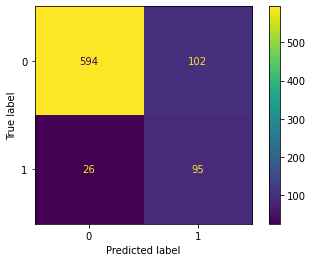

In [43]:
# Instantiate classifier
knn = KNeighborsClassifier()

# fit
knn.fit(X_train_res, y_train_res)

# predict
y_pred = knn.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))
      
# visualize performance
knn_cfm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cfm)
disp.plot();

The KNN model is able to predict whether a customer will churn with an accuracy of 84%. The F1 score is 59%, which is an improvement from the logistic regression baseline model. I will now tune the model to optimize performance.I will use GridSearch because it allows tuning of multiple hyerparameters in one go.

Tuning KNN Model

In [25]:
# find optimal no of k neighbours, optimal algorithm using gridsearch
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [10, 20]
    }
# Instantiate GridSearchCV
knn_grid_search = GridSearchCV(knn,param_grid, cv=10,return_train_score=True)

# Fit to the data
knn_grid_search.fit(X_train_res, y_train_res)
print(knn_grid_search.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2}


In [41]:
# retrain model using new parameters
knn_tuned = KNeighborsClassifier(n_neighbors=2, algorithm="auto",leaf_size=10)

# fit
knn_tuned.fit(X_train_res, y_train_res)

# predict
y_pred = knn_tuned.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94       696
        True       0.63      0.65      0.64       121

    accuracy                           0.89       817
   macro avg       0.78      0.79      0.79       817
weighted avg       0.89      0.89      0.89       817

Precision is: 0.626984126984127
Recall is: 0.6528925619834711
accuracy: 0.8910648714810282
F1 score is: 0.6396761133603239


After tuning the hyperparameters, the KNN model has an improvement in perfromance. The accuracy score has increased from 84% to 89%, meaning the second KNN model is able to predict whether or not a customer will churn with an accuracy of 89%. The tuned KNN model also has an F1 score of 63%, which is the best performance thus far.

## Model III - Decision Tree

The decision tree algorithm makes a classification by recursive partitioning of the sample space, ie the data is split into subsets until a predetermined criteria is met. Decision Tree is easy to use easy to visualize and understand.

              precision    recall  f1-score   support

       False       0.96      0.94      0.95       696
        True       0.70      0.75      0.73       121

    accuracy                           0.92       817
   macro avg       0.83      0.85      0.84       817
weighted avg       0.92      0.92      0.92       817

Precision is: 0.7
Recall is: 0.7520661157024794
accuracy: 0.9155446756425949
F1 score is: 0.7250996015936254


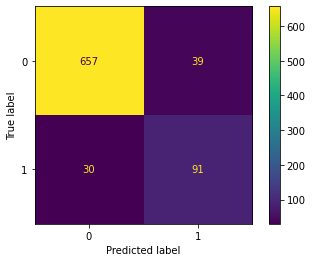

In [64]:
# Instantiate 
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)

# fit
dt.fit(X_train_res,y_train_res)

# predict
y_pred = dt.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))

# visualize performance
dt_cfm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cfm)
disp.plot();

The accuracy of the Decision Tree model is 91%; it will correctly predict whether or not a customer will churn with an accuracy of 91%. The F1 score is 72%. This model is therefore performing well.


Tuning Decision Tree Model

In [59]:
# use GridSearch to search for optimal hyperparameters of the dt model
param_grid = {
    "max_depth": [2, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [2, 5, 7],
}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt,param_grid, cv=10,return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_res, y_train_res)
print(dt_grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [61]:
# retrain model using new parameters
# Instantiate 
dt_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=7, min_samples_leaf=2,
                                  min_samples_split = 5,random_state=42)

# fit
dt_tuned.fit(X_train_res,y_train_res)

# predict
y_pred = dt_tuned.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.94      0.95       696
        True       0.71      0.78      0.74       121

    accuracy                           0.92       817
   macro avg       0.83      0.86      0.85       817
weighted avg       0.92      0.92      0.92       817

Precision is: 0.706766917293233
Recall is: 0.7768595041322314
accuracy: 0.9192166462668299
F1 score is: 0.7401574803149605


Tuning of the decision tree model improved the F1 score from 72% to 74%, indicating that the model is performing better after tuning. The accuracy score between the first dt model and the tuned one has remained relatively similar, which is a sign that the model may be overfitting.

In [63]:
# checking for overfitting on training data
train_scores = cross_val_score(dt, X_train_res, y_train_res, cv=5)
print("Cross-Validation Scores:", train_scores)
print("Mean Score:", train_scores.mean())

Cross-Validation Scores: [0.92142857 0.93325387 0.93563766 0.94040524 0.94398093]
Mean Score: 0.9349412565979908


In [37]:
# checking for overfitting on testing data
test_scores = cross_val_score(dt, X_test_scaled, y_test, cv=5)
print("Cross-Validation Scores:", test_scores)
print("Mean Score:", test_scores.mean())

Cross-Validation Scores: [0.88414634 0.91463415 0.9202454  0.92638037 0.88957055]
Mean Score: 0.9069953613646566


The train score mean is higher than the test score, meaning the model is likely to be overfitting. I will use bagging to try and reduce the overfitting.

## Model IV - Random Forest

Because of the overfitting in the decision tree model, an alternative to use would be random forest. Random Forest algorithm work similar to decision tree, but it introduces more varaince that makes it resistant to overfitting.

In [94]:
# Instantiate
rf = RandomForestClassifier() 

# fit
rf.fit(X_train_res, y_train_res)

# predict
y_pred = rf.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       696
        True       0.83      0.75      0.79       121

    accuracy                           0.94       817
   macro avg       0.90      0.86      0.88       817
weighted avg       0.94      0.94      0.94       817

Precision is: 0.8348623853211009
Recall is: 0.7520661157024794
accuracy: 0.9412484700122399
F1 score is: 0.7913043478260869


The random forest model has an accuracy of 94% and an F1 score of 79%. Of more interest is whether it reduced the overfitting present in the decision trees model.

In [95]:
# checking for overfitting on training data
train_scores = cross_val_score(rf, X_train_res, y_train_res, cv=5)
print("Cross-Validation Scores:", train_scores)
print("Mean Score:", train_scores.mean())

Cross-Validation Scores: [0.93333333 0.96066746 0.95351609 0.95709178 0.94755662]
Mean Score: 0.9504330552244736


In [97]:
# checking for overfitting on testing data
test_scores = cross_val_score(rf, X_test_scaled, y_test, cv=5)
print("Cross-Validation Scores:", test_scores)
print("Mean Score:", test_scores.mean())

Cross-Validation Scores: [0.92682927 0.96341463 0.94478528 0.93865031 0.92638037]
Mean Score: 0.9400119706718538


There is decreased difference between cross val scores of the test and train sets, meaning there is less overfitting. I will tune the model to see whether this difference can decrease further. 

In [98]:
# use GridSearch to search for optimal hyperparameters 
param_grid = {
    "n_estimators": [100, 200],  
    "max_depth": [5,10,20],  
    "min_samples_split": [5, 10], 
    "min_samples_leaf": [1, 2, 4],  
      }

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf,param_grid, cv=10,return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train_res, y_train_res)
print(rf_grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [101]:
# retrain random forest algorith with new parameters
# Instantiate
rf_tuned = RandomForestClassifier(max_depth=20, min_samples_leaf=1,min_samples_split=5,
                           n_estimators=100) 

# fit
rf_tuned.fit(X_train_res, y_train_res)

# predict
y_pred = rf_tuned.predict(X_test_scaled)

# evaluate performance 
print(classification_report(y_test,y_pred))
print("Precision is:", precision_score(y_test, y_pred))
print("Recall is:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score is:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       696
        True       0.85      0.78      0.81       121

    accuracy                           0.95       817
   macro avg       0.90      0.88      0.89       817
weighted avg       0.94      0.95      0.95       817

Precision is: 0.8468468468468469
Recall is: 0.7768595041322314
accuracy: 0.9461444308445532
F1 score is: 0.810344827586207


The tuned random forest model has an accuracy of 94%, meaning it is able to predict whether or not a customer will churn with an accuracy of 94%. The model is also performing very well with a F1 score of 81%.

In [103]:
# checking for overfitting on training data
train_scores = cross_val_score(rf_tuned, X_train_res, y_train_res, cv=5)
print("Cross-Validation Scores:", train_scores)
print("Mean Score:", train_scores.mean())

Cross-Validation Scores: [0.9297619  0.96185936 0.9511323  0.9511323  0.94278903]
Mean Score: 0.9473349792837279


In [104]:
# checking for overfitting on testing data
test_scores = cross_val_score(rf_tuned, X_test_scaled, y_test, cv=5)
print("Cross-Validation Scores:", test_scores)
print("Mean Score:", test_scores.mean())

Cross-Validation Scores: [0.93292683 0.95731707 0.93865031 0.93865031 0.94478528]
Mean Score: 0.9424659584019153


The tuned random forest model has also overcome the overfitting that was present in decision tree and the 
random forest model without tuned hyperparameters.

## Model Comparison

In [ ]:
# create a comparison frame
comparison_frame = pd. DataFrame(columns=["Model","Accuracy","F1Score"])

In [112]:
# data
data = [
    {"Model": "LogisticRegression", "Accuracy": 0.77, "F1 Score": 0.51},
    {"Model": "KNN", "Accuracy": 0.84, "F1 Score": 0.59},
    {"Model": "KNN_Tuned", "Accuracy": 0.89, "F1 Score": 0.63},
    {"Model": "DecisionTree", "Accuracy": 0.91, "F1 Score": 0.72},
    {"Model": "DecisionTree_Tuned", "Accuracy": 0.92, "F1 Score": 0.74},
    {"Model": "RandomForest", "Accuracy": 0.92, "F1 Score": 0.74},
    {"Model": "RandomForest_Tuned", "Accuracy": 0.94, "F1 Score": 0.81}
]

# Create a comparison frame
df = pd.DataFrame(data)
df

Model  Accuracy  F1 Score
0  LogisticRegression      0.77      0.51
1                 KNN      0.84      0.59
2           KNN_Tuned      0.89      0.63
3        DecisionTree      0.91      0.72
4  DecisionTree_Tuned      0.92      0.74
5        RandomForest      0.92      0.74
6  RandomForest_Tuned      0.94      0.81

The best performing model is the Random Forest model with tuned hyperparameters. It is able to predict whether or not a customer will churn with an accuracy of 94%. The F1 score is also high at 81%, meaning the model is performing well and will be suitable for real world application. 

## Conclusion and Next Steps

 - SyriaTel can successfully use the Random Forest model to predict their churn rate and therefore put appropriate measures to retain their customers.
 
 - SyriaTel should closely monitor changes in their data. Changes in the dataset will change the distribution of the data and therefore affect the predictions that the model is able to make. 
 
 - Most models had the risk of overfitting. This is because of the collinearity of the features of the dataset. SyriaTel should aim to collect more information about their customers that can possibly help predict churn better, eg Customers' age, gender, profession.